<a href="https://colab.research.google.com/github/HAR5HA-7663/MCS-5993-Evolutionary-Computation-and-Deep-Learning/blob/main/Assignments/GD_HW1starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Gradient Descent (Steepest Descent) Algorithm for Optimization
### HW1 Assignment Disclaimer
*	Author Name: Harsha Yellela
*	LTU ID: 000798754
*	Work Ownership: This work is my own. It is not copied from classmates (Yes/No): Yes
*	AI Assistance: Percentage of code generated with AI tools
(If greater than 0%, briefly describe how AI was used): 20%  
[ i used it to understand rosenbrock function and how it is sturctured in a 3d space. ]
*	Understanding: I understand every part of this code (Yes/No):Yes
*	Confidence: I am confident that I can modify, adapt, and extend this code on my own (Yes/No):Yes


In [ ]:
import numpy as np

def sphere(x):
    return x[0]*x[0] + 2*x[1]*x[1]

def sphere_pd_x0(x):
    return 2*x[0]

def sphere_pd_x1(x):
    return  4*x[1]                      # <==== Complete


In [ ]:

# Original Rosenbrock function, https://en.wikipedia.org/wiki/Rosenbrock_function
def objfunc(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

def partialDerivative_x0(x):
    return -2+2*x[0]-400*x[0]*x[1]+400*x[0]**3

def partialDerivative_x1(x):
    return 200*(x[1]-x[0]**2)

# Easy Rosenbrock function, constant is 1, not 100
def rosenbrock(x):
    return (1-x[0])**2 + (x[1]-x[0]**2)**2

def rosenbrock_pd_x0(x):
    return -2+2*x[0]-4*x[0]*x[1]+4*x[0]**3

def rosenbrock_pd_x1(x):
    return 2*(x[1] - x[0]**2) # <===== Complete

In [ ]:
# Constants
MaxIter = 1000000
MaxTrial = 1
numVar = 2
low = -5
high = 5
learnRate = 0.0001

In [ ]:
# for plotting contour lines
import numpy as np
xlist = np.linspace(low, high, 100)
ylist = np.linspace(low, high, 100)
X, Y = np.meshgrid(xlist, ylist)

In [ ]:
import matplotlib.pyplot as plt

def plot_contour(objfunc, X_trj, Y_trj):
  plt.figure()
  cp = plt.contour(X, Y, objfunc([X,Y])) # <=== Complete objfunc is for Z

  plt.scatter(X_trj[0], Y_trj[0], color='blue') # initial point
  plt.scatter(X_trj[1:-1], Y_trj[1:-1], color='black', s=1) # s: markersize
  #plt.scatter(X_trj[1:-1], Y_trj[1:-1], color='black', marker='.')
  plt.scatter(X_trj[-1], Y_trj[-1], color='red') # -1 indices the last element
  plt.clabel(cp, inline=True, fontsize=10)
  plt.title('Contour Plot')
  plt.xlabel('x0')
  plt.ylabel('x1')
  plt.show()
  return

In [ ]:
import time
import numpy as np

def gradient_descent(objfunc, partialDerivative_x0, partialDerivative_x1, start_point, max_iterations, learning_rate, low_bound, high_bound):
    xp = np.array(start_point)
    p_val = objfunc(xp)
    print(f'{xp} {p_val:.4f}')
    X_trajectory = np.array([xp[0]])
    Y_trajectory = np.array([xp[1]])

    for g in range(1, max_iterations + 1):
        xo = np.empty(numVar)
        # complete this space <======

        xo[0] = xp[0] - learning_rate * partialDerivative_x0(xp)
        xo[1] = xp[1] - learning_rate * partialDerivative_x1(xp)

        # If offspring is out of the bound, set it to the boundary. Complete this space <======

        xo = np.clip(xo, low_bound, high_bound)

        o_val = objfunc(xo)

        xp = xo.copy()
        p_val = o_val
        print(f'{xp} {p_val:.4f}')
        # add two lines to append a new point <=======

        X_trajectory = np.append(X_trajectory, xp[0])
        Y_trajectory = np.append(Y_trajectory, xp[1])

        if p_val < 0.0005:
            print(f"Acceptable solution (last row above) found after {g} iterations.")
            return xp, p_val, g, X_trajectory, Y_trajectory, True

    print("Max iterations reached without finding an acceptable solution.")
    return xp, p_val, MaxIter, X_trajectory, Y_trajectory, False



--- Testing Sphere Function ---
************************** Trial # =  1
[ 2.26829313 -3.15534507] 25.0576
[ 2.26783947 -3.15408294] 25.0396
[ 2.2673859 -3.1528213] 25.0216
[ 2.26693242 -3.15156018] 25.0036
[ 2.26647904 -3.15029955] 24.9857
[ 2.26602574 -3.14903943] 24.9678
[ 2.26557254 -3.14777982] 24.9499
[ 2.26511942 -3.1465207 ] 24.9320
[ 2.2646664 -3.1452621] 24.9141
[ 2.26421346 -3.14400399] 24.8962
[ 2.26376062 -3.14274639] 24.8783
[ 2.26330787 -3.14148929] 24.8605
[ 2.26285521 -3.14023269] 24.8426
[ 2.26240264 -3.1389766 ] 24.8248
[ 2.26195016 -3.13772101] 24.8070
[ 2.26149777 -3.13646592] 24.7892
[ 2.26104547 -3.13521134] 24.7714
[ 2.26059326 -3.13395725] 24.7537
[ 2.26014114 -3.13270367] 24.7359
[ 2.25968911 -3.13145059] 24.7182
[ 2.25923717 -3.13019801] 24.7004
[ 2.25878533 -3.12894593] 24.6827
[ 2.25833357 -3.12769435] 24.6650
[ 2.2578819  -3.12644327] 24.6473
[ 2.25743033 -3.12519269] 24.6297
[ 2.25697884 -3.12394262] 24.6120
[ 2.25652744 -3.12269304] 24.5943
[ 2.25607614 

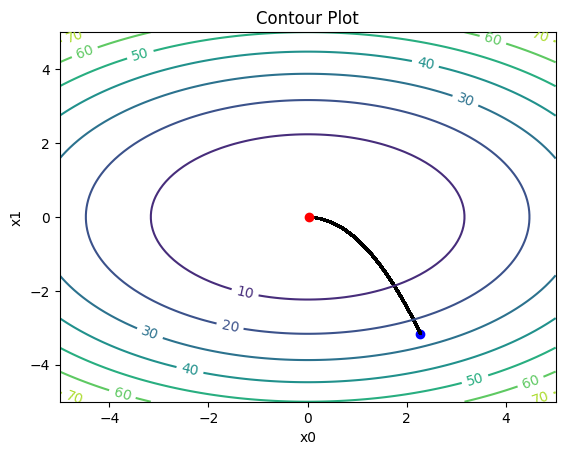

System Success for Sphere = 100.00% (1/1)
Total # of iterations used for Sphere = 23097
Average # of iterations used for Sphere = 23097.00

--- Testing Rosenbrock Function ---
************************** Trial # =  1
[ 1.37077205 -0.54454968] 6.0111
[ 1.36936903 -0.54406497] 5.9891
[ 1.36797003 -0.54358112] 5.9673
[ 1.36657502 -0.54309814] 5.9455
[ 1.36518398 -0.54261601] 5.9238
[ 1.36379691 -0.54213474] 5.9023
[ 1.36241377 -0.54165433] 5.8809
[ 1.36103455 -0.54117476] 5.8596
[ 1.35965924 -0.54069604] 5.8384
[ 1.35828782 -0.54021817] 5.8174
[ 1.35692027 -0.53974114] 5.7964
[ 1.35555657 -0.53926494] 5.7756
[ 1.3541967  -0.53878958] 5.7549
[ 1.35284065 -0.53831505] 5.7343
[ 1.35148841 -0.53784136] 5.7138
[ 1.35013995 -0.53736848] 5.6934
[ 1.34879525 -0.53689643] 5.6731
[ 1.34745431 -0.53642521] 5.6529
[ 1.34611711 -0.53595479] 5.6328
[ 1.34478362 -0.5354852 ] 5.6129
[ 1.34345383 -0.53501641] 5.5930
[ 1.34212773 -0.53454843] 5.5733
[ 1.3408053  -0.53408126] 5.5536
[ 1.33948652 -0.53361489]

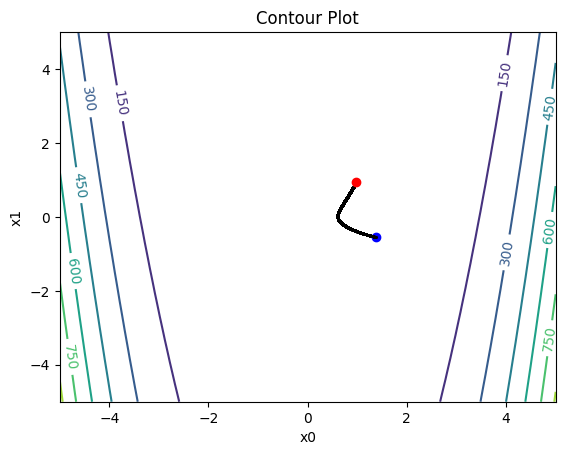

System Success for Rosenbrock = 100.00% (1/1)
Total # of iterations used for Rosenbrock = 79016
Average # of iterations used for Rosenbrock = 79016.00

--- Testing Rosenbrock_original Function ---
************************** Trial # =  1
[-0.80974001  3.59060568] 864.6547
[-0.90443917  3.53190714] 740.1505
[-1.00224047  3.4776292 ] 615.6527
[-1.10098739  3.42816634] 495.4767
[-1.19815841  3.38384648] 384.4047
[-1.29109188  3.34488122] 286.8051
[-1.37728984  3.31132196] 205.7027
[-1.45473564  3.28303406] 142.1629
[-1.52213885  3.2596985 ] 95.2468
[-1.57903682  3.24084266] 62.5249
[-1.62573329  3.22589296] 40.8699
[-1.66311272  3.21423527] 27.1887
[-1.69240246  3.20526944] 18.8801
[-1.71495128  3.19844858] 13.9960
[-1.73206479  3.19330076] 11.1988
[-1.7449074   3.18943572] 9.6293
[-1.75446031  3.18654104] 8.7623
[-1.76151746  3.18437284] 8.2890
[-1.76670271  3.18274426] 8.0329
[-1.77049587  3.18151414] 7.8952
[-1.77326028  3.18057697] 7.8215
[-1.77526799  3.17985447] 7.7821
[-1.77672098  

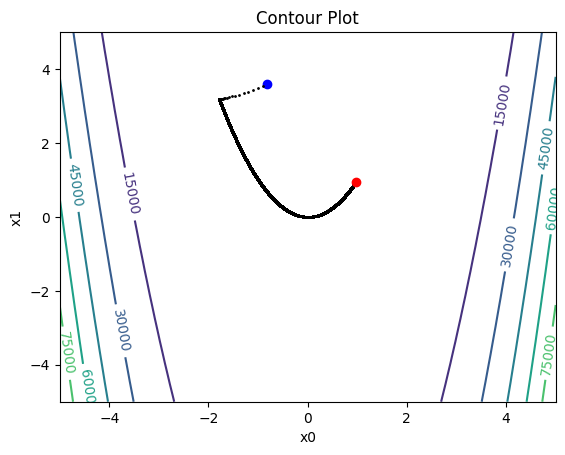

System Success for Rosenbrock_original = 100.00% (1/1)
Total # of iterations used for Rosenbrock_original = 87734
Average # of iterations used for Rosenbrock_original = 87734.00


In [ ]:
#################### MAIN ####################
totIter = 0
foundCnt = 0
func_success_counts = {}
func_iter_counts = {}

objective_functions = [
    (sphere, sphere_pd_x0, sphere_pd_x1, "Sphere"),
    (rosenbrock, rosenbrock_pd_x0, rosenbrock_pd_x1, "Rosenbrock"),
    (objfunc, partialDerivative_x0, partialDerivative_x1, "Rosenbrock_original")
]

np.random.seed(int(time.time())) # Added seed based on system time  (or use 42 to reproduce)

for objfunc, pd_x0, pd_x1, func_name in objective_functions:
    print(f"\n--- Testing {func_name} Function ---")
    func_success_counts[func_name] = 0
    func_iter_counts[func_name] = 0
    for trial in range(0, MaxTrial):
        print("************************** Trial # = ", trial + 1)
        start_point = np.random.uniform(low+1, high-1, numVar) # avoid boundary start
        # start_point = [0.5, 0.5] # to verify the plot of starting blue point
        final_point, final_value, iterations_used, X_trajectory, Y_trajectory, success = gradient_descent(
            objfunc, pd_x0, pd_x1, start_point, MaxIter, learnRate, low, high
        )

        if success:
            foundCnt += 1
            totIter += iterations_used
            func_success_counts[func_name] += 1
            func_iter_counts[func_name] += iterations_used
        else:
            totIter += MaxIter
            func_iter_counts[func_name] += MaxIter


        plot_contour(objfunc, X_trajectory, Y_trajectory)

    print(f"System Success for {func_name} = {func_success_counts[func_name]/MaxTrial*100:.2f}% ({func_success_counts[func_name]}/{MaxTrial})")
    print(f"Total # of iterations used for {func_name} = {func_iter_counts[func_name]}")
    print(f"Average # of iterations used for {func_name} = {func_iter_counts[func_name] / MaxTrial:.2f}")

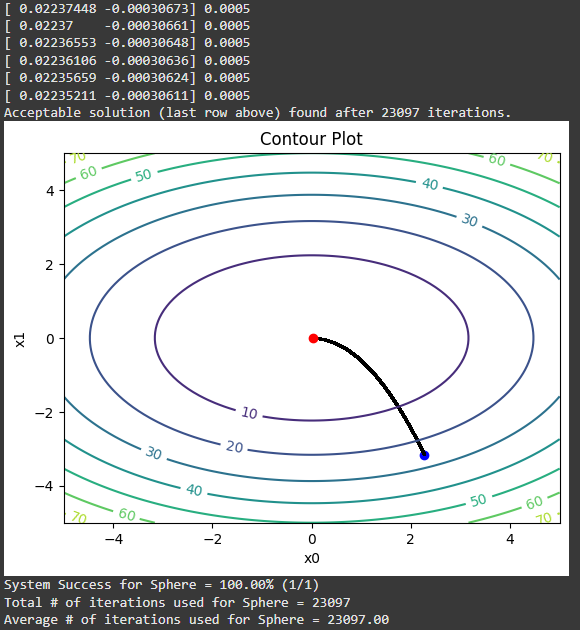

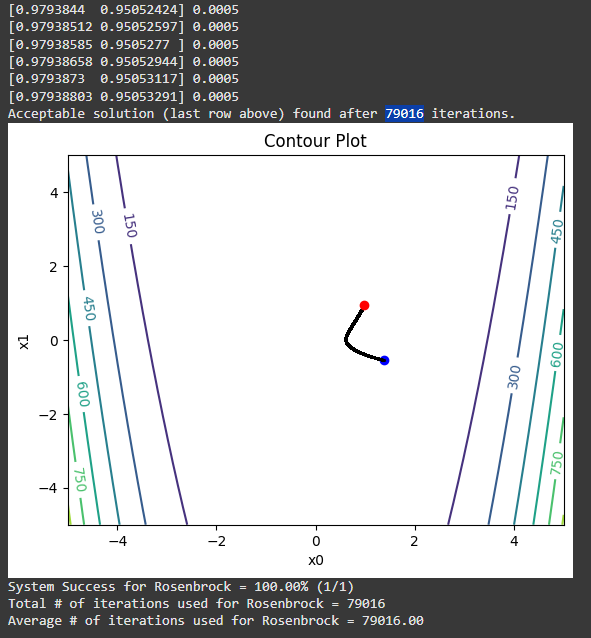

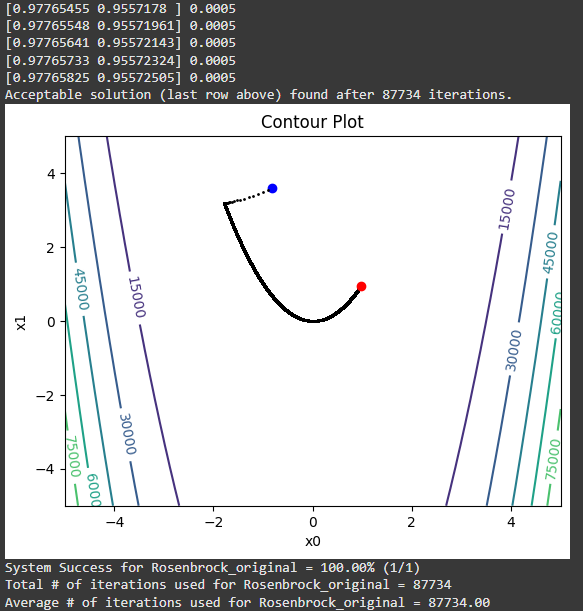